In [25]:
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import deque
import math

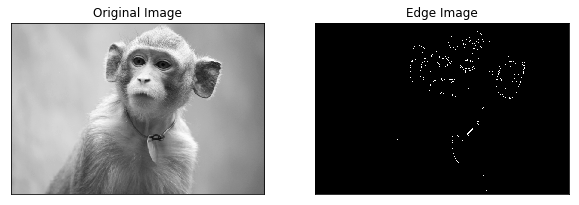

In [26]:
plt.rcParams["figure.figsize"] = (10,30)

img = cv2.imread('monkey.jpg',0)
edges = cv2.Canny(img,200,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

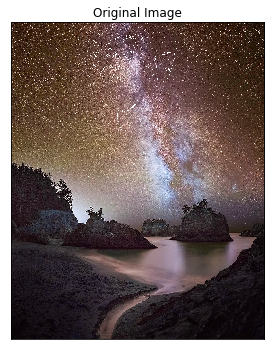

In [27]:
space = cv2.imread('space1.jpg')

for i in range(edges.shape[0]):
    for j in range(edges.shape[1]):
        if edges[i][j] == 255:
            space[i][j] = 255
        
plt.subplot(121),plt.imshow(space)
plt.title('Monki galaxy'), plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
# cv2.imwrite("filename1.png", space)

In [29]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(570, 844)


# Method 1: Cluster White Pixels In Neighbourhoods of Monky

In [43]:
testArr = np.copy(edges)


squareSize = 21
n, m = testArr.shape
for i in range(n//squareSize):
    for j in range(m//squareSize):
        nbWhitePixels = 0
        xAvg, yAvg = 0, 0
        for k in range(squareSize):
            for l in range(squareSize):
                if(testArr[i * squareSize + k][j * squareSize + l] == 255):
                    nbWhitePixels += 1
                    testArr[i * squareSize + k][j * squareSize + l] = 0
                    
                    xAvg += k
                    yAvg += l
        
        starRadius = int(math.sqrt(nbWhitePixels)) + 2
        if(starRadius < 3):
            continue
        
        xAvg = xAvg // nbWhitePixels
        yAvg = yAvg // nbWhitePixels
        
        for k in range(- starRadius//2, starRadius//2):
            for l in range(- starRadius//2, starRadius//2):
                if(abs(k) + abs(l) < starRadius//2):
                    testArr[i * squareSize + (xAvg) + k][j * squareSize + (yAvg) + l] = 255


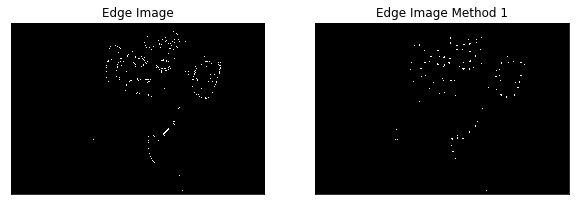

In [44]:
plt.subplot(121),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(testArr,cmap = 'gray')
plt.title('Edge Image Method 1'), plt.xticks([]), plt.yticks([])

plt.show()

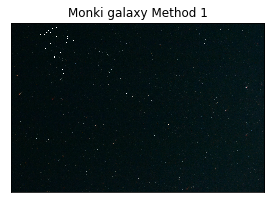

In [48]:
space = cv2.imread('space.jpg')

for i in range(testArr.shape[0]):
    for j in range(testArr.shape[1]):
        if testArr[i][j] == 255:
            space[i][j] = 255
        
plt.subplot(121),plt.imshow(space)
plt.title('Monki galaxy Method 1'), plt.xticks([]), plt.yticks([])
plt.show()

In [49]:
cv2.imwrite("filename3.png", space)

True

# Sobel gang

In [67]:
space = cv2.imread('space.jpg', 0)

numVertices = 20
neighbourhoodSize = 20

edgesX, edgesY = edges.shape
redEdgesX, redEdgesY = edgesX // neighbourhoodSize, edgesY // neighbourhoodSize

reducedEdges = np.zeros((redEdgesX, redEdgesY))

connectedZones = set()

for i in range(edges.shape[0]):
    for j in range(edges.shape[1]):
        if edges[i][j] == 255:
            reducedEdges[i//neighbourhoodSize][j//neighbourhoodSize] = 1
            connectedZones.add((i//neighbourhoodSize, j//neighbourhoodSize))

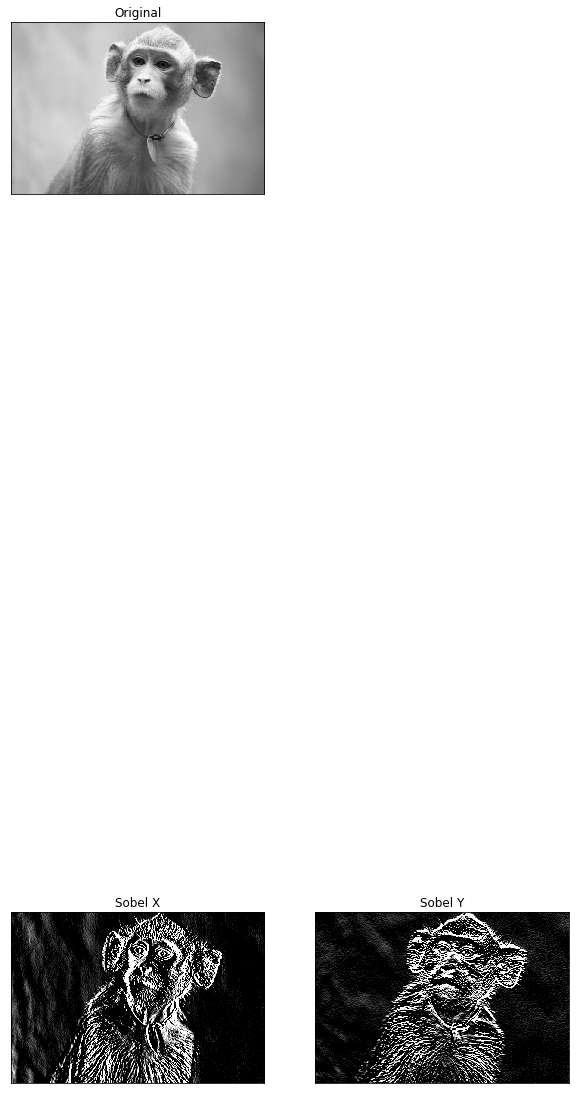

In [15]:
sobelx = cv2.Sobel(img,-1,1,0,ksize=5)
sobely = cv2.Sobel(img,-1,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [32]:
(sobelx > 254).sum()

41747

In [23]:
sobelx.shape

(570, 844)